In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [2]:
# Load dataset
data = pd.read_csv("../tumor_dataset_with_history_balanced.csv")
print("Shape:", data.shape)
print(data.head())
print(data.info())


Shape: (252, 16)
   Headache  Nausea  Mood  Cognitive  Speech  Seizures  Vision  Hearing  \
0         1       0     1          0       1         1       1        1   
1         2       1     1          1       0         0       0        1   
2         0       1     0          1       1         1       1        1   
3         2       0     0          0       0         0       0        1   
4         3       0     1          1       1         0       1        1   

   Balance  Sensory  Age  Gender  FamilyHistory  HeadInjury  \
0        1        1   35       1              0           1   
1        1        0   76       1              0           0   
2        1        0   41       1              0           0   
3        0        1   24       1              0           1   
4        1        1   80       0              1           1   

   RadiationExposure  Tumor  
0                  0      1  
1                  0      1  
2                  0      1  
3                  1      1  
4  

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_2756\1928735966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Tumor", data=data, palette="coolwarm")


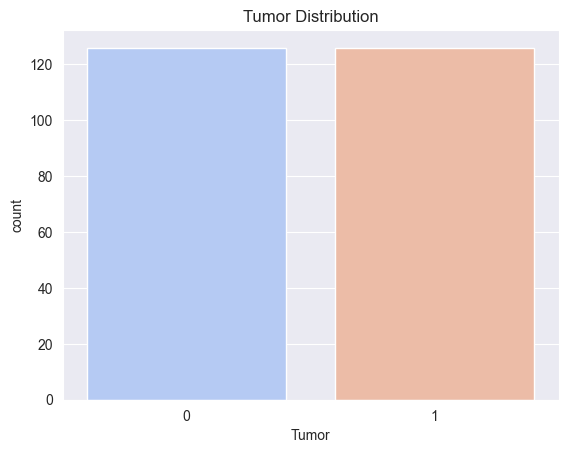

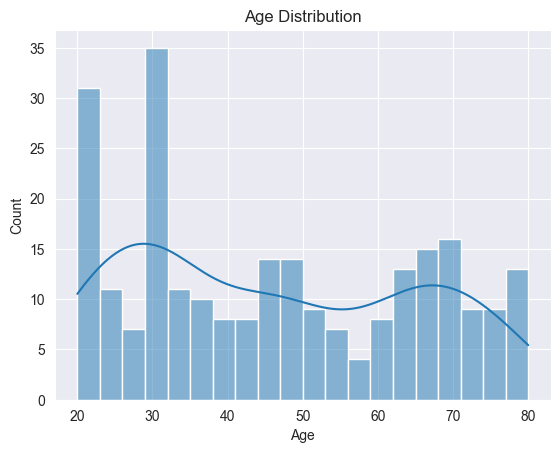

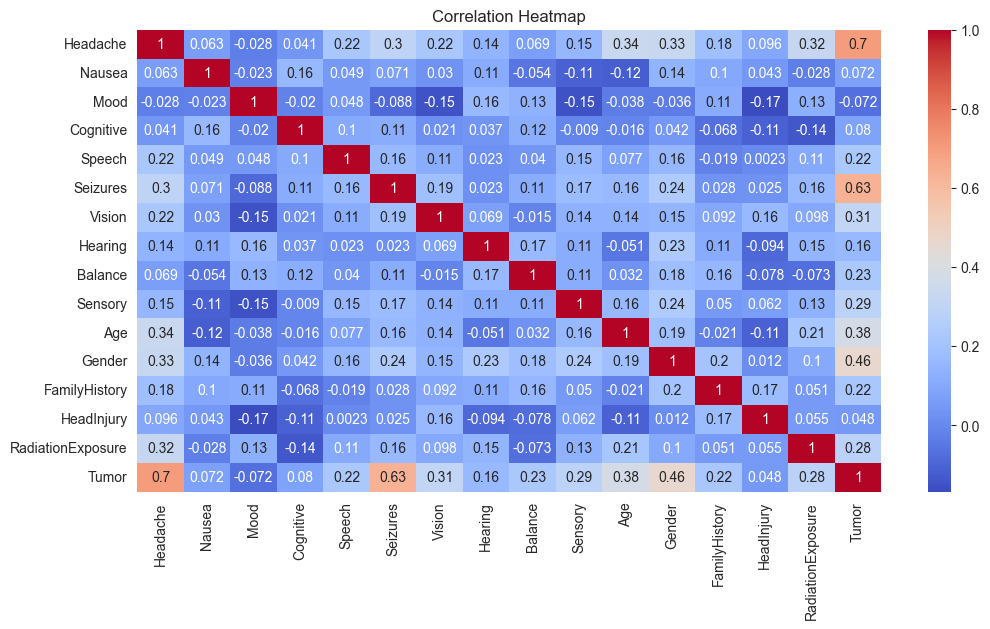

In [3]:
# Distribution of target variable
sns.countplot(x="Tumor", data=data, palette="coolwarm")
plt.title("Tumor Distribution")
plt.show()

# Age distribution
sns.histplot(data["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [4]:
# Encode categorical features if any are strings
categorical_cols = data.select_dtypes(include=["object"]).columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        data[col] = le.fit_transform(data[col])

# Split into features (X) and target (y)
X = data.drop("Tumor", axis=1)
y = data["Tumor"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


Accuracy: 0.9803921568627451

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        26
           1       0.96      1.00      0.98        25

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



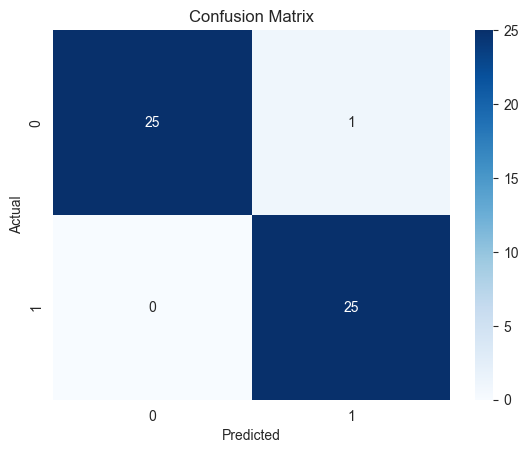

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [8]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation Accuracy:", cv_scores.mean())


Cross-validation Accuracy: 0.9725490196078432


In [9]:
# Save trained models
joblib.dump(model, "../brain_tumor_rf_model.pkl")
print("Model saved as brain_tumor_rf_model.pkl")

# Save scaler too (for consistent preprocessing later)
joblib.dump(scaler, "../scaler.pkl")
print("Scaler saved as scaler.pkl")


Model saved as brain_tumor_rf_model.pkl
Scaler saved as scaler.pkl
